## Perfil P Cygni de H$\alpha$ en AB Auriga

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
A=np.loadtxt("Espectro.dat")

In [13]:
l=A[:,0]
x=A[:,1]

Text(0, 0.5, 'Intensidad (unidades arbitrarias)')

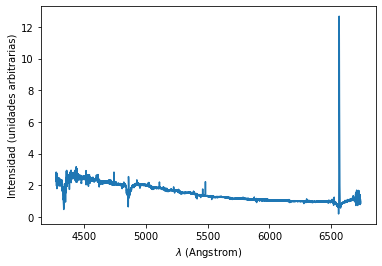

In [16]:
plt.plot(l,x)
plt.xlabel('$\lambda$ (Angstrom)')
plt.ylabel('Intensidad (unidades arbitrarias)')

Text(0, 0.5, 'Intensidad (unidades arbitrarias)')

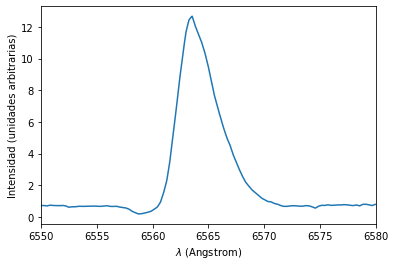

In [17]:
plt.plot(l,x)
plt.xlim(6550,6580)
plt.xlabel('$\lambda$ (Angstrom)')
plt.ylabel('Intensidad (unidades arbitrarias)')

In [12]:
def bbody(l,T,A,B):
    l=l/1.e10
    c2=1.439e-2
    A=A*1e-30
    return (A/l**5)*(1/(np.exp(c2/(l*T))-1))+B

In [14]:
Teff,Aeff,Beff= 9709.44991383, 1.68028516078, -0.97204325775

Text(0, 0.5, 'Intensidad (unidades arbitrarias)')

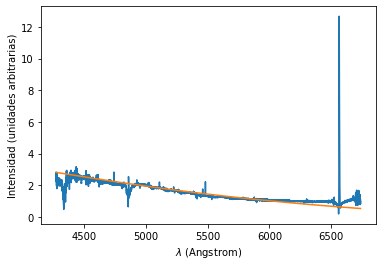

In [15]:
plt.plot(l,x)
plt.plot(l,bbody(l,Teff,Aeff,Beff))
plt.xlabel('$\lambda$ (Angstrom)')
plt.ylabel('Intensidad (unidades arbitrarias)')

In [18]:
bby=bbody(l,Teff,Aeff,Beff)

Text(0, 0.5, 'Intensidad (unidades arbitrarias)')

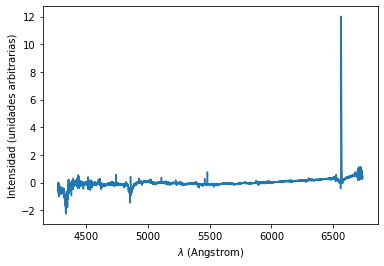

In [19]:
plt.plot(l,x-bby)
plt.xlabel('$\lambda$ (Angstrom)')
plt.ylabel('Intensidad (unidades arbitrarias)')

In [20]:
def pcyg(l,mu1,sigma1,A1,mu2,sigma2,A2):
    gs1=A1*np.exp(-(l-mu1)**2/(2.*sigma1**2))
    gs2=-A2*np.exp(-(l-mu2)**2/(2.*sigma2**2))
    return gs1+gs2

In [22]:
xnorm=x-bby

In [23]:
lmin=6550
lmax=6580
filt=(l>lmin)&(l<lmax)
xnorm=xnorm[filt]
l=l[filt]

Text(0, 0.5, 'Intensidad (unidades arbitrarias)')

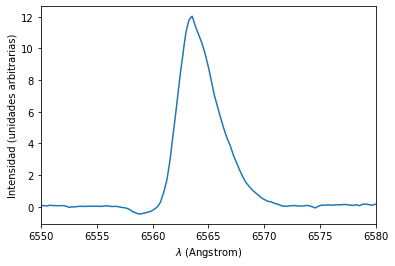

In [30]:
plt.plot(l,xnorm)
plt.xlim(6550,6580)
plt.xlabel('$\lambda$ (Angstrom)')
plt.ylabel('Intensidad (unidades arbitrarias)')

In [25]:
from scipy.optimize import curve_fit

In [26]:
par,pconv = curve_fit(pcyg, l, xnorm,p0=[6565.,2.,12.,6560.,1.,1.]) 
print(par)

[6.56330260e+03 2.32025071e+00 1.21602754e+01 6.56088222e+03
 1.33016574e+00 6.41218537e+00]


Text(0, 0.5, 'Intensidad (unidades arbitrarias)')

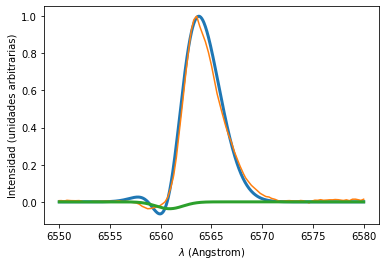

In [42]:
xn=xnorm/np.max(xnorm)
plt.plot(l,pcyg(l,par[0],par[1],par[2],par[3],par[4],par[5])/np.max(pcyg(l,par[0],par[1],par[2],par[3],par[4],par[5])),linewidth=3.,label="Gaussian fit")
plt.plot(l,xn)
plt.plot(l,pcyg(l,1,1,0,par[3],par[4],par[5])*-np.min(xn)/-np.min(pcyg(l,1,1,0,par[3],par[4],par[5])),linewidth=3.,label="Gaussian fit")
plt.xlabel('$\lambda$ (Angstrom)')
plt.ylabel('Intensidad (unidades arbitrarias)')

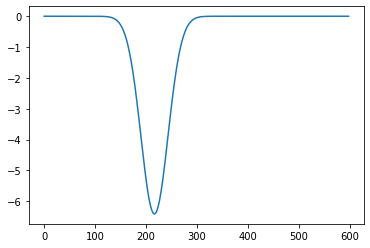

In [34]:
plt.plot(pcyg(l,1,1,0,par[3],par[4],par[5]))

In [55]:
shift=par[0]-par[3] # corrimiento de la componente de absorción (en angstrom)

In [56]:
shift*3e5/par[0] # velocidad de componente de absorción (en km/s) -> velocidad del viento estelar

110.63234737796826